# Recreación de figura 9 del paper especifico del punto 3.1.2
Figure 9 gives an example for an oblate fruit, where the relation between the major
axes of the projected ellipses and the major axes of the spheroid can be easily seen.
Views of an oblate fruit. The major principal axes are very similar in all views (2a ≈ 2A). The range of the minor principal axis in each view is 2B < 2bi < 2A. The minor principal axis of the spheroid is visible in the fourth view starting from the left (b4 ≈ B).

![Figure 9](figure9.png)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import notebook_functions
from statistics import mean

In [2]:
def draw_major_axe(image, center, angle, major_axe, color):
    thickness = 2

    degrees = np.deg2rad(angle)
    # Calculate major axis start and end coordinates
    major_axis_endpoint1 = (
        int(center[0] + major_axe / 2 * np.cos(degrees + np.pi / 2)),
        int(center[1] + major_axe / 2 * np.sin(degrees + np.pi / 2))
    )
    major_axis_endpoint2 = (
        int(center[0] - major_axe / 2 * np.cos(degrees + np.pi / 2)),
        int(center[1] - major_axe / 2 * np.sin(degrees + np.pi / 2))
    )

    cv2.line(image, major_axis_endpoint1, major_axis_endpoint2, color, thickness)
    return image



def join_images(images):
    min_height = min([image.shape[0] for image in images])
    resized_imgs = [cv2.resize(image, (image.shape[1], min_height)) for image in images]
    joined_imgs = cv2.hconcat(resized_imgs)
    return joined_imgs


In [3]:
fruit_type = "../data/tomatoes/obj0001"
image_files = [file for file in os.listdir(fruit_type)]  # Get list of all img names inside of folder
major_axe_views = []
rot_angle_views = []
center_angle_views = []

for image_name in image_files:
    file_path = os.path.join(fruit_type, image_name)
    img = cv2.imread(file_path)
    mask = notebook_functions.create_mask_from_img(img)
    ellipse = notebook_functions.calculate_ellipse_from_mask(mask)
    center, axes_length, angle = ellipse
    _, major_axis_length = axes_length
    major_axe_views.append(major_axis_length)
    rot_angle_views.append(angle)
    center_angle_views.append(center)

# SPHEROID CALCULATION
major_axe_spheroid = mean(major_axe_views)

In [4]:
imgs_with_axes = []
for index, image_name in enumerate(image_files):
    file_path = os.path.join(fruit_type, image_name)
    img = cv2.imread(file_path)
    draw_major_axe(img, center_angle_views[index], rot_angle_views[index], major_axe_views[index], (255, 0, 0))
    draw_major_axe(img, center_angle_views[index], rot_angle_views[index] + 90, major_axe_spheroid, (0, 255, 0))
    imgs_with_axes.append(img)

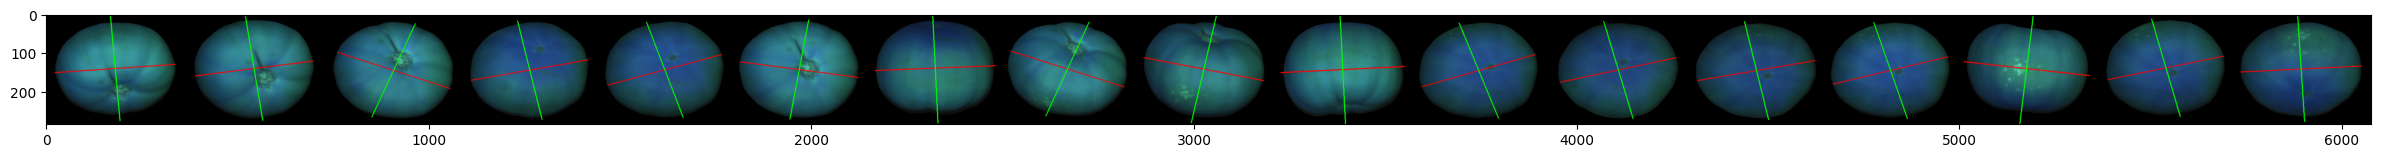

In [5]:
final_img = join_images(imgs_with_axes)
plt.figure(figsize=(30, 30))
plt.imshow(final_img)

In [6]:
cv2.imwrite('figure_9_recreation.png', final_img)

True

## Recreación de img
Línea azul: Eje mayor de la vista

Línea verde: Eje mayor del esferoide resultante

![Figure 9 recreation](figure_9_recreation.png)